template instances: 8
non-linear constraints: 2530
linear constraints: 0
public inputs: 5
private inputs: 0
public outputs: 1
wires: 2530
labels: 2638
Written successfully: ./main.r1cs
Written successfully: ./main.sym
Written successfully: ./main_js/main.wasm
Everything went okay


                                             Score Comparison                                             
┏━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ UID ┃ Actual Price ┃ Predicted Price ┃ Date Difference ┃ Baseline Score ┃    Circom Score ┃ Difference ┃
┡━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│   0 │     444.0000 │        464.0000 │              13 │      83.126126 │       83.126126 │  +0.000000 │
│   1 │     863.0000 │        863.0000 │               2 │      98.000000 │       98.000000 │  +0.000000 │
│   2 │     155.0000 │        164.0000 │               9 │      86.006452 │       86.006451 │  +0.000000 │
│   3 │     500.0000 │        475.0000 │              12 │      83.700000 │       83.700000 │  +0.000000 │
│   4 │     991.0000 │       1003.0000 │               2 │      96.958628 │       96.958628 │  +0.000000 │
│   5 │     112.0000 │        126.0000 │               0 │      89.250000 │       89.250000 │  +0.000000 │
│   6 │     886.0000 │        893.0000 │               8 │      91.320542 │       91.320542 │  +0.000000 │
│   7 │     780.0000 │        771.0000 │               6 │      93.007692 │       93.007692 │  +0.000000 │
│   8 │     191.0000 │        215.0000 │               6 │      83.193717 │       83.193717 │  +0.000000 │
│   9 │     754.0000 │        759.0000 │               7 │      92.429708 │       92.429708 │  +0.000000 │
│  10 │     240.0000 │        257.0000 │               0 │      93.908333 │       93.908333 │  +0.000000 │
│  11 │     603.0000 │        594.0000 │               8 │      90.716418 │       90.716418 │  +0.000000 │
│  12 │     480.0000 │        518.0000 │               0 │      93.191667 │       93.191667 │  +0.000000 │
│  13 │     177.0000 │        185.0000 │               5 │      91.112994 │       91.112994 │  +0.000000 │
│  14 │     525.0000 │        547.0000 │               8 │      88.396190 │       88.396190 │  +0.000000 │
│  15 │     208.0000 │        220.0000 │               7 │      88.038462 │       88.038461 │  +0.000000 │
│  16 │     282.0000 │        279.0000 │               1 │      98.085106 │       98.085106 │  +0.000000 │
│  17 │     159.0000 │        157.0000 │               5 │      93.918239 │       93.918239 │  +0.000000 │
│  18 │     470.0000 │        479.0000 │              11 │      87.353191 │       87.353191 │  +0.000000 │
│  19 │     134.0000 │        115.0000 │               5 │      82.805970 │       82.805970 │  +0.000000 │
│  20 │     915.0000 │        926.0000 │              12 │      86.966120 │       86.966120 │  +0.000000 │
│  21 │     567.0000 │        547.0000 │               8 │      88.966490 │       88.966490 │  +0.000000 │
│  22 │     500.0000 │        524.0000 │              11 │      84.872000 │       84.872000 │  +0.000000 │
│  23 │     813.0000 │        789.0000 │               9 │      88.461255 │       88.461254 │  +0.000000 │
│  24 │     187.0000 │        192.0000 │               8 │      89.700535 │       89.700535 │  +0.000000 │
│  25 │     863.0000 │        832.0000 │               8 │      88.910776 │       88.910776 │  +0.000000 │
│  26 │     161.0000 │        182.0000 │               1 │      87.782609 │       87.782609 │  +0.000000 │
│  27 │     435.0000 │        450.0000 │               7 │      90.034483 │       90.034483 │  +0.000000 │
│  28 │     170.0000 │        193.0000 │               1 │      87.364706 │       87.364706 │  +0.000000 │
│  29 │     694.0000 │        666.0000 │               1 │      95.530259 │       95.530259 │  +0.000000 │
│  30 │     367.0000 │        375.0000 │               8 │      90.125341 │       90.125340 │  +0.000000 │
│  31 │     745.0000 │        723.0000 │               2 │      95.460403 │       95.460403 │  +0.000000 │
│  32 │     654.0000 │        645.0000 │              13 │      85.816514 │       85.816514 │  +0.000000 │
│  33 │     770.0000 │        768.0000 │ 

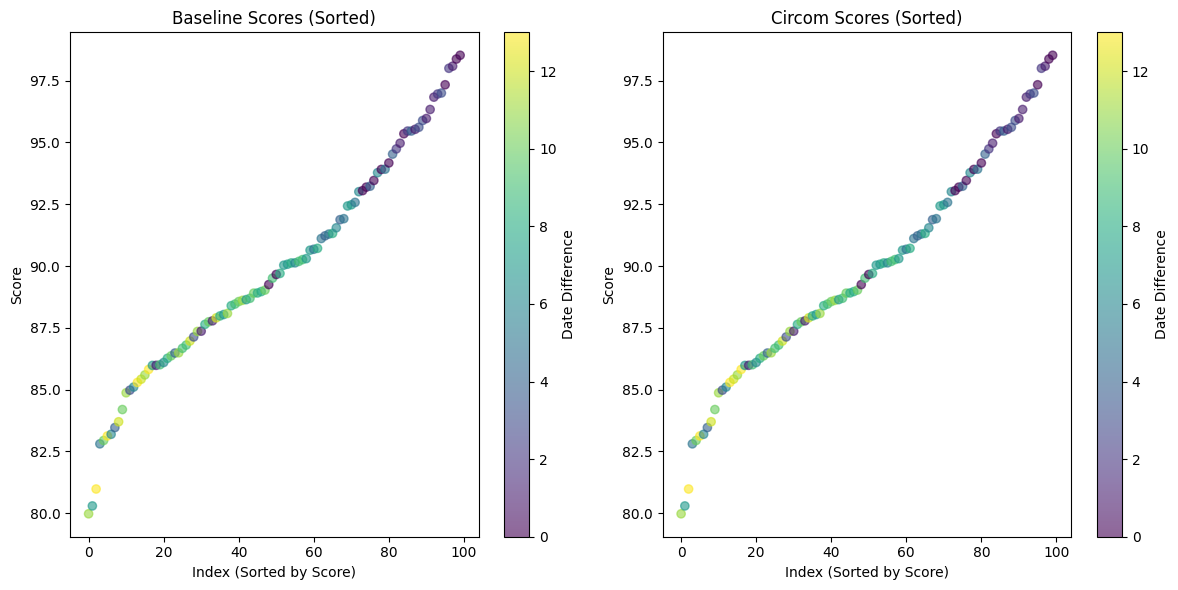

In [13]:
import os
import subprocess
import json
import numpy as np
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
from typing import List, Dict, Any
from datetime import datetime, timedelta

SCALE = 1_000_000_0
MAX_DAYS = 14
PRICE_WEIGHT = 86
DATE_WEIGHT = 14

if os.getcwd().split('/')[-1] != 'src':
    os.chdir("../../neurons/deployment_layer/sn48/src")

def generate_inputs(batch_size: int) -> List[Dict[str, Any]]:
    days_diffs = np.random.randint(0, MAX_DAYS, batch_size)
    actual_prices = np.random.uniform(100, 1000, batch_size)
    max_variations = np.minimum(actual_prices * 0.15, 40)
    price_variations = np.random.uniform(-max_variations, max_variations)
    predicted_prices = actual_prices + price_variations

    return [{
        "actual_price": int(ap),
        "predicted_price": int(pp),
        "date_difference": int(dd),
        "price_weight": PRICE_WEIGHT,
        "date_weight": DATE_WEIGHT
    } for ap, pp, dd in zip(actual_prices, predicted_prices, days_diffs)]

def run_baseline_calc_score(inputs: List[Dict[str, Any]]) -> List[float]:
    date_diffs = np.array([i["date_difference"] for i in inputs])
    date_scores = (np.maximum(0, 14 - date_diffs) / 14) * 100

    actual_prices = np.array([i["actual_price"] for i in inputs], dtype=float)
    predicted_prices = np.array([i["predicted_price"] for i in inputs], dtype=float)
    price_diffs = np.abs(actual_prices - predicted_prices) / actual_prices
    price_scores = np.maximum(0, 100 - (price_diffs * 100))

    return list((price_scores * 0.86) + (date_scores * 0.14))

def run_circom_calc_score(inputs: List[Dict[str, Any]]) -> List[float]:
    scores = []
    for input_data in inputs:
        scaled_input = {
            **input_data,
            "actual_price": int(input_data["actual_price"] * SCALE),
            "predicted_price": int(input_data["predicted_price"] * SCALE)
        }

        with open("input.json", "w") as f:
            json.dump(scaled_input, f)

        try:
            subprocess.run(
                ["node", "main_js/generate_witness.js", "main_js/main.wasm", "input.json", "witness.wtns"],
                check=True, capture_output=True
            )

            json_file = "witness.wtns.json"
            subprocess.run(["snarkjs", "wej", "witness.wtns", json_file], check=True)

            with open(json_file) as f:
                scores.append(float(json.load(f)[1]))

            os.remove(json_file)
            os.remove("witness.wtns")

        except subprocess.CalledProcessError as e:
            print(f"Error running witness generation:\n{e.stderr.decode()}")
            raise

    return scores

def compare_scores(inputs: List[Dict[str, Any]], baseline_scores: List[float], circom_scores: List[float]) -> None:
    table = Table(title="Score Comparison")

    for col, justify, style in [
        ("UID", "right", "cyan"),
        ("Actual Price", "right", "blue"),
        ("Predicted Price", "right", "blue"),
        ("Date Difference", "right", "blue"),
        ("Baseline Score", "right", "magenta"),
        ("Circom Score", "right", "green"),
        ("Difference", "right", "red")
    ]:
        table.add_column(col, justify=justify, style=style)

    diffs = np.abs(np.array(circom_scores)/SCALE - np.array(baseline_scores))
    red_diffs = diffs > 1000

    for i, (input_data, baseline, circom, diff, is_red) in enumerate(zip(inputs, baseline_scores, circom_scores, diffs, red_diffs)):
        table.add_row(
            f"{i}",
            f"{input_data['actual_price']:.4f}",
            f"{input_data['predicted_price']:.4f}",
            f"{input_data['date_difference']}",
            f"{baseline:.6f}",
            f"{circom/SCALE:.6f}",
            f"[{'red' if is_red else 'green'}]{diff:+.6f}[/{'red' if is_red else 'green'}]"
        )

    red_percentage = (red_diffs.sum() / len(baseline_scores)) * 100
    avg_diff = diffs.mean()

    table.add_row("", "", "", "", "", "", "")
    table.add_row("", "", "", "", "", "High Diff %:", f"[red]{red_percentage:.2f}%[/red]")
    table.add_row("", "", "", "", "", "Avg Difference:", f"[yellow]{avg_diff/SCALE:.6f}[/yellow]")

    console = Console()
    console.width = 140
    console.print(table)

def plot_scores(inputs: List[Dict[str, Any]], baseline_scores: List[float], circom_scores: List[float]) -> None:
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    for ax, scores, title in [
        (ax1, baseline_scores, 'Baseline Scores (Sorted)'),
        (ax2, circom_scores, 'Circom Scores (Sorted)')
    ]:
        sorted_indices = np.argsort(scores)
        sorted_scores = np.array(scores)[sorted_indices]
        date_diffs = [inputs[i]["date_difference"] for i in sorted_indices]

        scatter = ax.scatter(
            range(len(sorted_scores)),
            sorted_scores/SCALE if title.startswith('Circom') else sorted_scores,
            c=date_diffs,
            cmap="viridis",
            alpha=0.6
        )
        plt.colorbar(scatter, ax=ax, label='Date Difference')
        ax.set_title(title)
        ax.set_xlabel('Index (Sorted by Score)')
        ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()

def main():
    subprocess.run(["circom", "main.circom", "--r1cs", "--wasm", "--sym"], check=True)

    inputs = generate_inputs(100)
    baseline_scores = run_baseline_calc_score(inputs)
    circom_scores = run_circom_calc_score(inputs)

    compare_scores(inputs, baseline_scores, circom_scores)
    plot_scores(inputs, baseline_scores, circom_scores)

if __name__ == "__main__":
    main()